In [19]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import seaborn as sns

import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df["high_bmi"] = np.where(df.bmi > 30, 1, 0)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges,high_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [18]:
#df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/insurance.csv")
df["high_bmi"] = np.where(df.bmi > 30, 1, 0)
X = df.copy()
del X["charges"]
#del X["high_bmi"]
X = pd.get_dummies(X, drop_first=True)
X = StandardScaler().fit_transform(X)
y = df.charges

scores = cross_val_score(cv = 10, estimator=LinearRegression(), scoring="r2", X=X, y = y)
np.mean(scores) #0.74450069986676015

0.7497088844100136

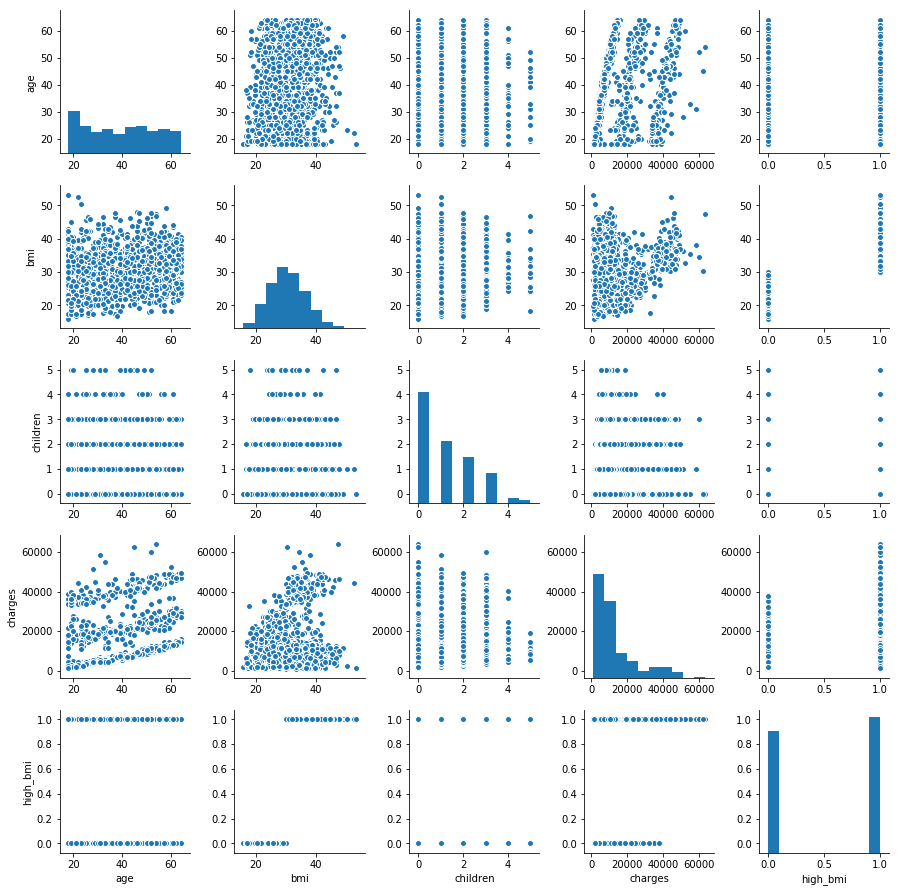

In [20]:
sns.pairplot(df)

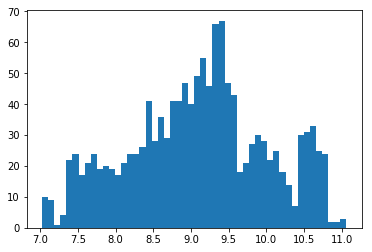

In [10]:
plt.hist(np.log(y), bins = 50);

0.7497088844100136